### Modeling
#### Naive Bayes Classification

Naive Bayes models are a group of extremely fast and simple classiciation algorithsm that are often suitable for high-dimensional datasets. Because they are so fast and have so few tunable parameters, they are useful as a quick-and-dirty baseline for a classification problem.

In Bayesian classification, we're interested in finding the probability of a label given some observed features. As a generative model, Naive Bayes specifies the hypothetical random process that generates the data. The "naive" in Naive Bayes comes from the fact that naive assumptions are made about the generative model for each label.

Benefits of Bayes Classifiers:
- Fast for training and prediction
- Straightforward probabilistic prediction
- Easily interprettable
- Few, if any, tuning parameters

Naive Bayes Classifiers:
- Gaussian
- Multinomial
- Bernoulli

Here I choose a Gaussian Naive Bayes Classifier because our model features are continuous.

In [ ]:
# load libraries

# load data and visualization
import numpy as np
import pandas as pd
import seaborn as sns

# machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Lasso
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix


In [ ]:
# load data from csv

train_data = pd.read_csv('data/train_data_fe.csv')
test_data = pd.read_csv('data/test_data_fe.csv')


In [ ]:
# basic train data info

display(train_data.head())
train_data.info()


,id,img_id,da,dp,fwidth,flength,fthickness,elength,ethickness,ewidth,...,ellipticity,fiber_length,fiber_width,krumbein_rnd,stone_soil,thick_vol_prod,thick_perm_prod,thick_trans_prod,rnd_ell_prod,stone_soil_enc
0,11680,7936,0.005536,0.003348,0.003611,0.002566,0.005662,0.003406,0.006415,0.003943,...,0.035570,0.000000,0.000000,1.0,soil,1.845767e-09,0.000052,0.000000,0.220725,0
1,45478,15130,0.007464,0.004704,0.005979,0.003631,0.009375,0.004436,0.008944,0.005497,...,0.029433,0.000000,0.000000,1.0,soil,1.140420e-08,0.000106,0.021905,0.210526,0
2,16623,8959,0.005823,0.003265,0.004310,0.002339,0.006758,0.003208,0.007217,0.004436,...,0.024371,0.000000,0.000000,1.0,soil,4.284816e-09,0.000060,0.017676,0.235653,0
3,40689,13711,0.007587,0.004815,0.006018,0.003771,0.009436,0.004694,0.008821,0.005422,...,0.033913,0.004139,0.009476,1.0,soil,1.433765e-08,0.000109,0.023930,0.219033,0
4,5106,5866,0.005536,0.003348,0.003611,0.002566,0.005662,0.003406,0.006415,0.003943,...,0.035570,0.000000,0.000000,1.0,soil,1.845767e-09,0.000052,0.000000,0.220725,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62890 entries, 0 to 62889
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  62890 non-null  int64  
 1   img_id              62890 non-null  int64  
 2   da                  62890 non-null  float64
 3   dp                  62890 non-null  float64
 4   fwidth              62890 non-null  float64
 5   flength             62890 non-null  float64
 6   fthickness          62890 non-null  float64
 7   elength             62890 non-null  float64
 8   ethickness          62890 non-null  float64
 9   ewidth              62890 non-null  float64
 10  volume              62890 non-null  float64
 11  area                62890 non-null  float64
 12  perimeter           62890 non-null  float64
 13  chull_area          62890 non-null  float64
 14  chull_perimeter     62890 non-null  float64
 15  sphericity          62890 non-null  float64
 16  l_t_

In [ ]:
# drop unneeded columns

train_data.drop(['id','img_id','hash','stone_soil'], axis = 1, inplace = True)


In [ ]:
x = train_data.drop('stone_soil_enc', axis = 1)
y = train_data['stone_soil_enc']

In [ ]:
# Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 20220216)

In [ ]:
x_train.columns

Index(['da', 'dp', 'fwidth', 'flength', 'fthickness', 'elength', 'ethickness',
       'ewidth', 'volume', 'area', 'perimeter', 'chull_area',
       'chull_perimeter', 'sphericity', 'l_t_ratio', 't_l_aspect_ratio',
       'compactness', 'roundness', 'ellipse_ratio', 'circularity', 'solidity',
       'concavity', 'convexity', 'extent', 'transparency', 'curvature',
       'surface_area', 'l_w_ratio', 'w_l_ratio', 'w_t_ratio', 't_w_ratio',
       'chull_surface_area', 'sieve', 'angularity', 'ellipticity',
       'fiber_length', 'fiber_width', 'krumbein_rnd', 'thick_vol_prod',
       'thick_perm_prod', 'thick_trans_prod', 'rnd_ell_prod'],
      dtype='object')

In [ ]:
## recursive feature elimination via lasso regression
model_rfe = RFECV(Lasso(alpha = 0.0001), cv = 5)
x = model_rfe.fit(x_train, y_train)
rfe = model_rfe.ranking_
features = ['da', 'dp', 'fwidth', 'flength', 'fthickness', 'elength', 'ethickness',
       'ewidth', 'volume', 'area', 'perimeter', 'chull_area',
       'chull_perimeter', 'sphericity', 'l_t_ratio', 't_l_aspect_ratio',
       'compactness', 'roundness', 'ellipse_ratio', 'circularity', 'solidity',
       'concavity', 'convexity', 'extent', 'transparency', 'curvature',
       'surface_area', 'l_w_ratio', 'w_l_ratio', 'w_t_ratio', 't_w_ratio',
       'chull_surface_area', 'sieve', 'angularity', 'ellipticity',
       'fiber_length', 'fiber_width', 'krumbein_rnd', 'thick_vol_prod',
       'thick_perm_prod', 'thick_trans_prod', 'rnd_ell_prod']
rfe_df = pd.DataFrame({'features': features, 'rfe_rank': rfe}, index = np.arange(len(features)))

In [ ]:
# selecting predictive features
new_rfe = rfe_df[rfe_df["rfe_rank"] == 1]

In [ ]:
# list features
new_rfe

,features,rfe_rank
0,da,1
18,ellipse_ratio,1
19,circularity,1
20,solidity,1
24,transparency,1
25,curvature,1
27,l_w_ratio,1
28,w_l_ratio,1
29,w_t_ratio,1
30,t_w_ratio,1


In [ ]:
l = []
for col in new_rfe["features"]:
    l.append(col)
x_train_new = x_train[l]
x_test_new = x_test[l]

In [ ]:
# fit naive bayes model

classifier = GaussianNB()

# train

model = classifier.fit(x_train_new, y_train)

In [ ]:
pred = model.predict(x_test_new)

In [ ]:
accuracy_score(y_test, pred)

0.8820162187947209

In [ ]:
precision_score(y_test, pred)

0.16510903426791276

In [ ]:
# cross-validation with f1 metric

model_score = cross_val_score(model, x_train, y_train, scoring = "f1")
print(model_score)
print(model_score.mean())

[0.1446281  0.14527363 0.12929293 0.13953488 0.13771186]
0.13928828168699778


In [ ]:
# cross-validation with accuracy metric

model_score = cross_val_score(model, x_train, y_train, scoring = "accuracy")
print(model_score)
print(model_score.mean())

[0.91771837 0.91463778 0.91433115 0.91542437 0.91910157]
0.9162426484564457


In [ ]:
# cross-validation with precision metric

model_score = cross_val_score(model, x_train, y_train, scoring = "precision")
print(model_score)
print(model_score.mean())

[0.23890785 0.22121212 0.2031746  0.21974522 0.24163569]
0.22493509697567085


In [ ]:
# cross-validation with recall metric

model_score = cross_val_score(model, x_train, y_train, scoring = "recall")
print(model_score)
print(model_score.mean())

[0.1037037  0.10814815 0.09481481 0.10222222 0.0962963 ]
0.10103703703703704


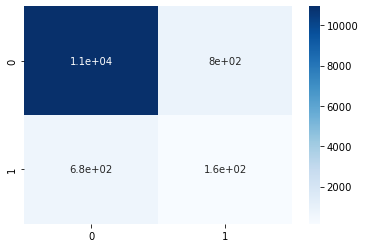

In [ ]:
conf = confusion_matrix(y_test, pred)
sns.heatmap(conf, annot=True, cmap = "Blues");